## Instructions
- See deadline on the course web page
- This problem set is performed individually.See examination rules on the course web page.
- Students are allowed to discuss together and help each other when solving the problems. However, every student must understand and be able to explain his/her submitted solution. Plagiarism is not allowed (submissions will be both manually and automatically monitored).
- The two notebooks for each problem set contain a number of basic and extra problems; you can choose which and how many to work on.
- Many problems are automatically graded using `assert` statements. You should check that your code passes these statements without raising an `AssertionError`. Note that there might be additional, hidden tests that must be passed for full credit. In addition, some tasks are either completely manually graded or part-automatic/part-manual.
- Note that grading is performed in the teacher's python environment, which is based on the conda `environment.yml` file in the course github repo. Please avoid using additional python modules (such as `plotly`) as this might cause automatic tests to fail.

- **Important:** Hand-in is performed through the following actions:
  - Make sure to always complete **Task 0** in the header part of the notebook. 
  - Upload your solution in the form of your edited version of this jupyter notebook via the appropriate module in Canvas.
  - The name of the uploaded file **must be the same as the original one**!
  
  Note that the hand-in might not be automatically graded if you have changed the name of the uploaded file.

- Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

- Make sure that the **run time is smaller than a few minutes**. If needed you might have to reduce some computational tasks; e.g. by decreasing the number of grid points or sampling steps. Please ask the supervisors if you are uncertain about the run time. 

- Your solutions are usually expected where it says `YOUR CODE HERE` or <font color="red">"PLEASE WRITE YOUR ANSWER HERE"</font>.

### Task 0 
#### (0 points)
Fill your personal details in the dictionary 'student' with the following key/value pairs:
- **Lastname**: Your lastname as a string
- **Firstname**: Your firstname as a string
- **DOB-year**: The year for your date of birth as a four-digit integer
- **DOB-month**: The month for your date of birth as an integer (1-12)
- **DOB-day**: The year for your date of birth as an integer (1-31)
- **CID**: Your Chalmers login ID as a string

In [2]:
student={}
# Update the values below. Note the formats.
student['Lastname']='Brundin'  # string
student['Firstname']='Isak' # string
student['CID']='isakbr'        # string
student['DOB-year']=1997         # four-digit integer
student['DOB-month']=9           # integer in the range [1, 12]
student['DOB-day']=23             # integer in the range [1, 31]

# 
# YOUR CODE HERE
# 

In [3]:
for key in ['Lastname', 'Firstname','CID']:
    assert type(student[key]) is str, f'{key} is wrong type.'
    assert student[key] not in ['name_here','cid_here'],\
        f'Fill your {key} as a string.'

for key in ['DOB-year', 'DOB-month','DOB-day']:
    assert type(student[key]) is int, f'{key} is wrong type.'

assert (student['DOB-year'] > 1900 and student['DOB-year'] < 2100)
assert student['DOB-month'] in range(1,13), \
    'DOB month should be an integer in the range [1, 12]'
assert student['DOB-day'] in range(1,32), \
    'DOB day should be an integer in the range [1, 31]'

# Problem Set 1
## Basic problems
### Learning from data [TIF285], Chalmers, Fall 2021

Last revised: 29-Aug-2021 by Christian Forssen [christian.forssen@chalmers.se]

## Problem 1
### (1 point)

#### Installations
Perform the installations and preparations that are described in the Getting Started instructions. At the end you should have:

1. downloaded the current version of the course material from the github repository or from the course web page;
2. a running python installation that includes the modules listed in the environment.yml file (e.g. numpy, matplotlib, pandas, emcee, scikit-learn, ...);
3. been able to open and run the Jupyter Notebooks with the first week excercises.
Ask the computer lab supervisors for assistance if needed.

In [4]:
# Module needed for grading tests
import sys

# Make sure that you are running python with version >= 3.x
#
# Import the following python modules with
# the specified abreviations:
# ---
# numpy as np
# scipy as scipy
# matplotlib.pyplot as plt
# pandas as pd
# sklearn as skl
# emcee as emcee


import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl
import emcee

In [5]:
assert sys.version_info.major>=3, \
    'You are running Python version'+\
    f'{sys.version_info.major}.{sys.version_info.minor}'

modules = [('numpy','np'), ('scipy', 'scipy'), \
           ('matplotlib.pyplot', 'plt'), ('pandas', 'pd'), \
           ('sklearn', 'skl'), ('emcee', 'emcee')]
for (_module, _module_abbrev) in modules:
    assert _module in sys.modules and _module_abbrev in dir(),\
        f'Module {_module} not loaded properly.'

## Problem 2
### (3 points)

#### Generate data

In [6]:
# Generate noisy data with a quadratic feature
# use the following code:
np.random.seed(42)
m = 100 # Number of data

# X are picked uniform random [0,2]
X = 2 * np.random.rand(m, 1)
# Linear relation to the predicted value, but with Gaussian noise (mean=0, variance=1)
y = 0.5 * X**2 + X + 2 + 0.2 * np.random.randn(m, 1)

#### (a) Perform a linear regression using the Normal Equation
Create the design matrix for a quadratic polynomial and solve the normal equation using matrix inversion.

In [7]:
def design_matrix(X, degree=2):
    """
    Returns a design matrix.
    
    Args:
        X: Array of shape (m,1) with 'm' independent data.
        degree: Integer with the degree of the polynomial. 
                  Note that a degree-n polynomial has n+1 coefficients.
                  
    Returns:
        X_d: Design matrix of shape (m, order+1).
        
    """
    m = X.shape[0]
    X_d = np.zeros((m, degree+1))
    for i in range(m):
        for j in range(degree+1):
            X_d[i,j] = X[i]**j
    return X_d

In [8]:
assert design_matrix(X).shape == (len(X),3)
assert design_matrix(X)[:,0].all() == 1
assert design_matrix(X)[0,1] == X[0]
assert design_matrix(X)[0,2] == X[0]**2

In [9]:
def solve_normal_equation(X_d, y):
    """
    Solve the normal equation.
    
    Args:
        X_d: Design matrix of shape (m,n) with 'm' independent data
               and 'n' features.
        y: Dependent data of shape (m,1).
                  
    Returns:
        theta_best: Best parameters, array of shape (n,).
        
    """
    X_t = np.transpose(X_d)
    X_inv = np.linalg.inv(np.matmul(X_t,X_d))
    theta_best = np.matmul(X_inv, X_t).dot(y).flatten()
    return theta_best


In [10]:
assert (solve_normal_equation(design_matrix(X), y)).shape==(3,),\
    'Return object has wrong shape. Maybe the `flatten` method will be useful?'

#### (b) Comparisons: 
- Print and compare the coefficients from the true data generator and the normal equation. 
- Plot the data and the model predictions in the same figure.

[2.11228054 0.72777588 0.61621274]


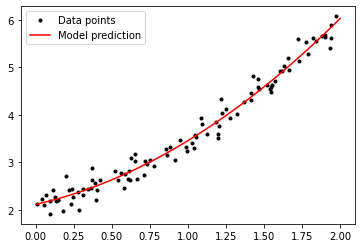

In [27]:
# Print and compare the coefficients from the true data generator and the normal equation.
# Plot the data and the model predictions in the same figure.
%matplotlib inline

theta = solve_normal_equation(design_matrix(X), y)

plt.plot(X,y,'k.', label = 'Data points')
x_new = np.linspace(0,2,100)
y_new = theta[0] + theta[1]*x_new+theta[2]*x_new**2
plt.plot(x_new,y_new,'r', label = 'Model prediction')
plt.legend()
print(theta)

## Problem 3
### (3 points)

There are three files in the directory `DataFiles`:
- `dataset1.dat`
- `dataset2.dat`
- `dataset3.dat`

Each data files contains two columns. The first column corresponds to the independent variables (the array X), and the second column corresponds to the dependent ones (the array y).

In [12]:
# This cell is used in the solution notebook to generate the data. 
# It is hidden in the student version.
# 
# Please ignore the comment in this cell that says "YOUR CODE HERE". It gets added automatically.
# No solution code is needed here.
# ---
# 
# YOUR CODE HERE
# 

#### (a) Implement linear regression and cost function
- Load a data set and split it into 60% training and 40% validation data using the python function below.
- Implement a linear regression function that takes training data as input and returns a best-fit parameter vector for a polynomial model of a specified degree.
- Implement a cost function that takes data and model parameters as input and returns the mean-squared error.

In [13]:
# built-in convenience function for splitting data
from sklearn.model_selection import train_test_split

def load_data(datafile, train_size=0.6):
    """
    Reads data from file and returns training and validation sets.
    
    Args:
        datafile: String with data filename path. The data file 
            should contain two columns: x, y
        train_size: float indicating the fraction of training data
            (default: 0.6)
            
    Returns:
        (X_train, X_val, y_train, y_val): Tuple with four arrays 
            with training and validation data.
    """
    X, y = np.loadtxt(datafile, unpack=True)
    m = len(X)
    X = X.reshape(m,1); y = y.reshape(m,1)

    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, train_size=train_size, random_state=42)
    return (X_train, X_val, y_train, y_val)

In [14]:
# Implement a linear regression function that takes 
# training data as input and returns a best-fit parameter 
# vector for a polynomial model of a specified degree.

def linear_regression(X, y, degree=2):
    """
    Performs linear regression for a polynomial model.
    
    Args:
        X: Array of shape (m,1) with 'm' independent data.
        y: Array of shape (m,1) with 'm' dependent data.
        degree: Integer with the degree of the polynomial. 
                  Note that a degree-n polynomial has n+1 coefficients.
                  
    Returns:
        theta_fit: Best fit parameters. Array of shape (degree+1,)
    
    """
    X_mat = design_matrix(X,degree)
    theta = solve_normal_equation(X_mat,y)
    return theta
    

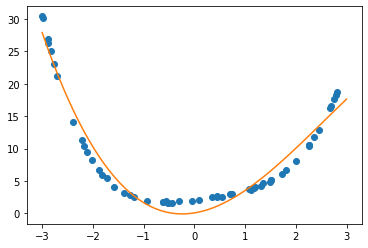

In [67]:
datafile = 'DataFiles/dataset1.dat'
(X_train, X_val, y_train, y_val) = load_data(datafile)
degree = 3
theta = linear_regression(X_train, y_train, degree=degree)
plt.plot(X_train,y_train,'o')
x_new = np.linspace(-3,3,len(X_train))
y_new = theta[0]
for i in range(degree):
    y_new += x_new**(i+1)*theta[i+1]
plt.plot(x_new,y_new)
plt.show()

In [55]:
datafile = 'DataFiles/dataset1.dat'
(X_train, X_val, y_train, y_val) = load_data(datafile)
assert len(linear_regression(X_train, y_train, degree=3))==4
a0_degree3fit_residual = \
    linear_regression(X_train, y_train, degree=3)[0] - 0.041779
assert abs(a0_degree3fit_residual) < 1e-5


In [56]:
# Implement a cost function that takes data and polynomial model 
# parameters as input and returns the mean-squared error.
def mean_squared_error(X, y, theta):
    """
    Compute the mean-squared error for data and a polynomial fit.
    
    Args:
        X: Array of shape (m,1) with 'm' independent data.
        y: Array of shape (m,1) with 'm' dependent data.
        theta: Parameter array [shape (degree+1,)]. 
            The ordering corresponds to the constant term first.
            
    Return:
        MSE (float): Mean-squared error defined as
            MSE = (1/m) * sum_i (y[i] - y_model[i])**2,
            where y_model[i] = \sum_m theta[m]*X[i]**m 
    """
    m = len(X)
    theta_index = np.linspace(0,len(theta)-1,len(theta))
    y_model_i = np.array([np.sum([theta[int(the)]*x_i**the for the in theta_index]) for x_i in X.reshape(m,1)])
    MSE = 1/m*np.sum((y.flatten()-y_model_i)**2)
    return MSE

In [18]:
# Implement a function that takes data and polynomial model degree
# and returns the mean-squared error for both training and validation data
# as well as the best fit parameters.
def polynomial_regression( data, degree):
    """
    Compute the mean-squared error for data and a polynomial fit.
    
    Args:
        data = (X_train, X_val, y_train, y_val): Tuple with four arrays 
            with training and validation data.
        degree: Integer with the degree of the polynomial. 
                  Note that a degree-n polynomial has n+1 coefficients.
            
    Return:
        MSE_train: Mean-squared error of training data
        MSE_val: Mean-squared error of validation data
        theta_fit: Best fit parameters [array of shape (degree+1,)]
    """
    X_t, X_v, y_t, y_v = data
    theta_t = linear_regression(X_t, y_t, degree)
    theta_v = linear_regression(X_v, y_v, degree)
    MSE_t = mean_squared_error(X_t, y_t, theta_t)
    MSE_v = mean_squared_error(X_v, y_v, theta_v)
    if MSE_t<MSE_v:
        MSE_v = mean_squared_error(X_v, y_v, theta_t)
        theta = theta_t
    else:
        MSE_t = mean_squared_error(X_t, y_t, theta_v)
        theta = theta_v
    return MSE_t, MSE_v, theta
    # 
    # YOUR CODE HERE
    # 

In [19]:
X_train=np.array([[1],[2],[3]])
y_train=np.array([[2],[5],[10]])
assert mean_squared_error(X_train, y_train, np.array([1,0,1]))==0
assert mean_squared_error(X_train, y_train, np.array([0,0,0]))==43

X_val = np.array([[4],[5]])
y_val = np.array([[17],[27]])
MSE_train, MSE_val, theta_fit = \
    polynomial_regression( (X_train, X_val, y_train, y_val), 2)
assert MSE_val-0.5 < 1e-5


#### (b) Perform linear regression with different polynomial models
- For each data set you should then perform linear regression using polynomial models of order 1,2,3,4,5, and 20.
- Finally, print the fit coefficients for each polynomial model that was considered and print also the mean-squared error (MSE) for both the training and the validation sets.

In [20]:
datafile1 = 'DataFiles/dataset1.dat'
data_1 = load_data(datafile1)
datafile2 = 'DataFiles/dataset2.dat'
data_2 = load_data(datafile2)
datafile3 = 'DataFiles/dataset3.dat'
data_3 = load_data(datafile3)

degrees = [1,2,3,4,5,20]
frst_reg = list()
scnd_reg = list()
thrd_reg = list()
for num in degrees:

    frst_reg.append(polynomial_regression(data_1, num))
    scnd_reg.append(polynomial_regression(data_2, num))
    thrd_reg.append(polynomial_regression(data_3, num))
for ind, reg in enumerate(frst_reg):
    print((f'The parameters for the first dataset for polynomial model {degrees[ind]} is: \n'
          f'{reg[2]}, the MSE for training is {reg[0]} and for validation {reg[1]}\n'))
print('\n')
for ind, reg in enumerate(scnd_reg):
    print((f'The parameters for the second dataset for polynomial model {degrees[ind]} is: \n'
          f'{reg[2]}, the MSE for training is {reg[0]} and for validation {reg[1]}\n'))

print('\n')
for ind, reg in enumerate(thrd_reg):
    print((f'The parameters for the third dataset for polynomial model {degrees[ind]} is: \n'
          f'{reg[2]}, the MSE for training is {reg[0]} and for validation {reg[1]}\n'))

The parameters for the first dataset for polynomial model 1 is: 
[ 7.04236224 -0.10918805], the MSE for training is 64.62697963376287 and for validation 32.64434257449972

The parameters for the first dataset for polynomial model 2 is: 
[ 0.67301071 -0.07966003  2.2021869 ], the MSE for training is 7.449049071507785 and for validation 1.7587385725297293

The parameters for the first dataset for polynomial model 3 is: 
[ 0.72896181  0.89360827  2.2212237  -0.18887657], the MSE for training is 4.656471243639916 and for validation 1.3626787288122908

The parameters for the first dataset for polynomial model 4 is: 
[ 2.01852155  1.02406407  0.47817465 -0.25544313  0.25335571], the MSE for training is 0.011252343860266696 and for validation 0.0045549328154530075

The parameters for the first dataset for polynomial model 5 is: 
[ 2.01762753e+00  1.03533797e+00  4.80507837e-01 -2.62096671e-01
  2.52894180e-01  7.65111794e-04], the MSE for training is 0.010758548308706024 and for validation 0.

Use the text cell below to answer the following two questions:
- Which degrees of polynomials do you think was used for generating the different datasets?
- Which dataset do you think has the most noise?

Discuss your reasoning.

***Discussion***

We can see in the data above that the lowest MSE(both training and validation) is achieved for polynomial 4 and 5. It is very similar values for polynomial 3 for dataset 2 and 3 but the polynomial values for dataset 1 is considerably larger.

It is reasonable to assume that if the values for polynomial 4 and 5 are similiar the fit for 4 is better, since it will be less overfitted. We can also note that the fifth parameter for polynomial is very small for dataset 1, and comfortably the smallest for dataset 2 and 3. The other 4 parameters are very similiar, the same parity and agree to 1-2 decimals. Therefor the conclussion can be drawn that polynomial 5 is essentially polynomial 4 with and added small fifth parameter. This would explain the similar MSE values. The same argument can be made when comparing polynomil 3 to 4, similar values, small added fourth term, for dataset 2 and 3. Hence I think that for dataset 1 polynomial 4 was used and for dataset 2, 3 polynomial 3 was used.

I think that the third dataset has the most noice. This is because no fit yields low MSE for any polynomial. Even for the presumed used polynomial 3 it still has the MSE for training is 4.1145 and for validation 1.9173. Compare this to the lowest MSE for dataset 1 at around 0.0113 and 0.00456 and for dataset 2 around 0.257 and 0.12 for training and validation respectively.


## Problem 4
### (3 points)

### Standard medical example by applying Bayesian rules of probability

Suppose there is an unknown disease (call it UD) and there is a test for it.

a. The false positive rate is 2.3%. ("False positive" means the test says you have UD, but you don't.) <br>
b. The false negative rate is 1.4%. ("False negative" means you have UD, but the test says you don't.)

Assume that 1 in 10,000 people have the disease. You are given the test and get a positive result.  Your ultimate goal is to find the probability that you actually have the disease. 
$% Some LaTeX definitions we'll use.
\newcommand{\pr}{\textrm{p}}
$

We'll do it using the Bayesian rules.

We'll use the notation:

* $H$ = "you have UD"
* $\overline H$ = "you do not have UD"  
* $D$ = "you test positive for UD"
* $\overline D$ = "you test negative for UD"  

Use the text cell below to answer the following questions:
<br>
Notation: $H$ = "you have UD", &nbsp;&nbsp; $\overline H$ = "you do not have UD",  &nbsp;&nbsp; $D$ = "you test positive for UD", &nbsp;&nbsp;  $\overline D$ = "you test negative for UD" 

a. *Before doing a calculation (or thinking too hard :), does your intuition tell you the probability you have the disease is high or low?*
<br>

b. *In the $p(\cdot | \cdot)$ notation, what is your ultimate goal?*
<br>

c. *Express the false positive rate in $p(\cdot | \cdot)$ notation.* \[Ask yourself first: what is to the left of the bar?\]
<br>

d. *Express the false negative rate in $p(\cdot | \cdot)$ notation. By applying the sum rule, what do you also know? (If you get stuck answering the question, do the next part first.)* 
<br>

e. *Should $p(D|H) + p(D|\overline H) = 1$?
    Should $p(D|H) + p(\overline D |H) = 1$?
    (Hint: does the sum rule apply on the left or right of the $|$?)*
<br>

f. *Apply Bayes' theorem to your result for your ultimate goal (don't put in numbers yet).
   What other probabilities do we need?*
<br>

* * *
**PLEASE WRITE YOUR ANSWER HERE** 
* * *
a) high!
b) p(H,D) (p you have UD given you test positive)
c) p(D,$\overline H$)

In [21]:
# Please fill the probabilities as values for the 
# corresponding keys in the following dictionary.
medical_example_probabilities = {}
medical_example_probabilities['p(D|Hbar)'] = 0.0
medical_example_probabilities['p(Dbar|H)'] = 0.0
medical_example_probabilities['p(D|H)'] = 0.0
medical_example_probabilities['p(H,Hbar|D)'] = 0.0
medical_example_probabilities['p(Hbar)'] = 0.0
medical_example_probabilities['p(D)'] = 0.0
medical_example_probabilities['p(H|D)'] = 0.0

# 
# YOUR CODE HERE
# 

In [22]:
for key in ['p(D|Hbar)', 'p(Dbar|H)', 'p(D|H)']:
    assert medical_example_probabilities[key] > 0.
    assert medical_example_probabilities[key] < 1.
    
assert medical_example_probabilities['p(H,Hbar|D)'] <= 1.0


AssertionError: 

In [ ]:
for key in ['p(Hbar)', 'p(D)', 'p(H|D)']:
    assert medical_example_probabilities[key] > 0.
    assert medical_example_probabilities[key] < 1.